In [118]:
!pip install textblob

from textblob import TextBlob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import io
import re


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [3]:
from google.colab import files
##IMport all CSV files
uploaded = files.upload()

##The data used below was retieved from twitters api
##Due to potential terms and service violation, the following files cannot be released

Saving BoredApeYachtClub_6_2021Tweets.csv to BoredApeYachtClub_6_2021Tweets.csv
Saving BoredApeYachtClub_7_2021Tweets.csv to BoredApeYachtClub_7_2021Tweets.csv


In [119]:
##Clean the tweet of any links, pictures or extra emojis
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

##Function to determine the tweets sentiment
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'


positiveTweets = 0
negativeTweets = 0
neutralTweets=0

fileTitles = ["BoredApeYachtClub_6_2021Tweets.csv", "BoredApeYachtClub_7_2021Tweets.csv"]

##For each file
for i in fileTitles:
  dfVal = pd.read_csv(io.BytesIO(uploaded[i]))
  dfText = dfVal['text']
  print(i)
  for i in range(len(dfText)):
    ##Add to sentiment count
    sentiment = get_tweet_sentiment(dfText[i])
    if(sentiment == "positive"):
      positiveTweets += 1
    elif (sentiment == "neutral"):
      neutralTweets += 1
    else:
      negativeTweets += 1
    

totalTweets = positiveTweets + neutralTweets + negativeTweets
print("Time Frame - 2021 - June  -  2021 - July")
print("Negative tweets total " +str(negativeTweets) + " percentage " + str(round((negativeTweets / totalTweets)* 100 ,0)) + "%")
print("Positive tweets total " +str(positiveTweets) + " percentage " + str(round((positiveTweets / totalTweets)*100,0)) + "%")
print("Neutral tweets total " +str(neutralTweets) + " percentage " + str(round((neutralTweets / totalTweets)*100,0)) + "%")
print(totalTweets)



BoredApeYachtClub_6_2021Tweets.csv
BoredApeYachtClub_7_2021Tweets.csv
Time Frame - 2021 - June  -  2021 - July
Negative tweets total 16467 percentage 17.0%
Positive tweets total 50372 percentage 52.0%
Neutral tweets total 30418 percentage 31.0%
97257


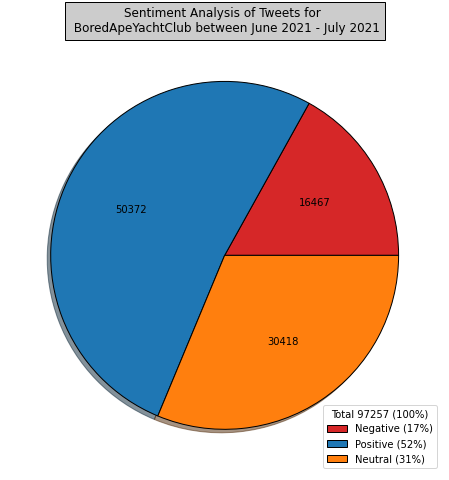

In [120]:
import matplotlib.pyplot as plt


##Produce the Pie Chart for the 3 sentiment totals
vals2 =np.array([negativeTweets, positiveTweets, neutralTweets])

vals = np.array([round((negativeTweets / totalTweets)* 100 ,0),round((positiveTweets / totalTweets)* 100 ,0), round((neutralTweets / totalTweets)* 100 ,0)])
labels = ['Negative (' + str(int(vals[0])) + "%)", 'Positive ('+str(int(vals[1])) +"%)", "Neutral ("+str(int(vals[2])) + "%)"]
colors = ["#d62728","#1f77b4", "#ff7f0e"  ]
explode = (0, 0, 0)

def absoluteVal(val):
  a  = np.round(val/100.*vals2.sum(), 0)
  return int(a)

plt.figure(figsize=(8, 8))
plt.pie(vals2, explode=explode, colors = colors ,shadow=True, startangle=0,autopct = absoluteVal, wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True})
plt.title("Sentiment Analysis of Tweets for \n BoredApeYachtClub between June 2021 - July 2021", bbox={'facecolor':'0.8', 'pad':5})
h = plt.legend(loc="lower right" , labels=labels, title="Total " + str(vals2.sum()) + " (100%)");
h.FontSize = 6;

plt.show() 